Stock Analysis Paper Circuit

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install yfinance
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.4 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [ ]:
circuit = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
circuit.x(0)
circuit.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
c: 2/═════

In [ ]:
# Create a new quantum circuit with 1 quantum register and 1 classical register
qc = QuantumCircuit(1, 1)

# Assuming 'a' and 'b' are predefined parameters for the angles
# Replace 'a' and 'b' with the actual values you want to use for the rotations
a = 1.0 # replace with the actual value for 'a'
b = 1.0 # replace with the actual value for 'b'

# Add rotation around the y-axis by 2*a and 2*b respectively
qc.ry(2 * a, 0)
qc.ry(2 * b, 0)

# Add a measurement to the classical bit
qc.measure(0, 0)

# The circuit can then be executed on a quantum simulator or real quantum hardware
# using the execute function from qiskit

# This is just an example, remember to replace 'a' and 'b' with actual values
qc.draw()

┌───────┐┌───────┐┌─┐
  q: ┤ Ry(2) ├┤ Ry(2) ├┤M├
     └───────┘└───────┘└╥┘
c: 1/═══════════════════╩═
                        0

<ipython-input-7-98e495109842>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


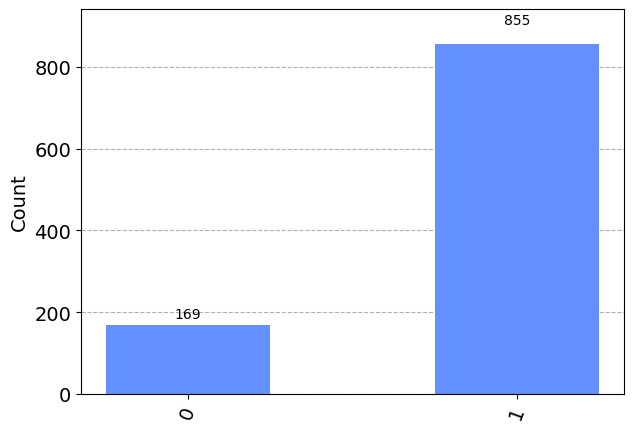

In [ ]:
# Create a simulator backend object named 'sim' using Aer.
sim = Aer.get_backend('aer_simulator')
# Assemble the quantum circuit 'qc_ha' into a qobj (quantum object) suitable for simulation.
qobj = assemble(qc)
# Run the assembled qobj on the simulator backend 'sim' and obtain the result.
result = sim.run(qobj).result()
# Extract the counts (measurement outcomes) from the result and store them in the 'counts' variable.
counts = result.get_counts()
# Plot a histogram of the counts, showing the distribution of measurement outcomes.
plot_histogram(counts)

In [ ]:
# Create a new quantum circuit with 1 quantum register and 1 classical register
qc = QuantumCircuit(1, 1)

# Assuming 'a' and 'b' are predefined parameters for the angles
# Replace 'a' and 'b' with the actual values you want to use for the rotations
a = 1.0 # replace with the actual value for 'a'
b = 1.0 # replace with the actual value for 'b'

# Add rotation around the y-axis by 2*a and 2*b respectively
qc.ry(2 * a, 0)
qc.ry(-2 * b, 0)

# Add a measurement to the classical bit
qc.measure(0, 0)

# The circuit can then be executed on a quantum simulator or real quantum hardware
# using the execute function from qiskit

# This is just an example, remember to replace 'a' and 'b' with actual values
qc.draw()

┌───────┐┌────────┐┌─┐
  q: ┤ Ry(2) ├┤ Ry(-2) ├┤M├
     └───────┘└────────┘└╥┘
c: 1/════════════════════╩═
                         0

<ipython-input-9-f382dfaf1e97>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


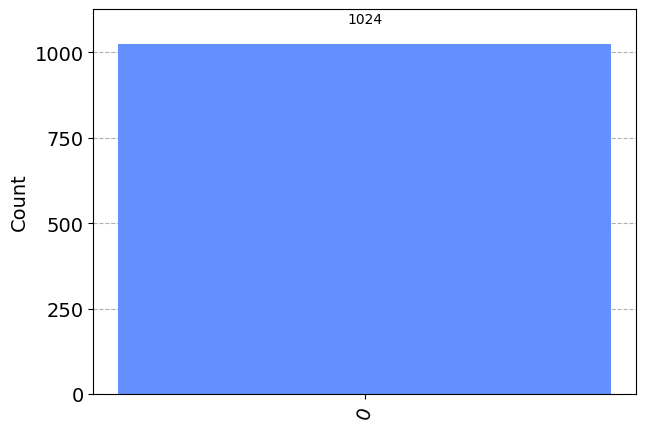

In [ ]:
# Assemble the quantum circuit 'qc_ha' into a qobj (quantum object) suitable for simulation.
qobj = assemble(qc)
# Run the assembled qobj on the simulator backend 'sim' and obtain the result.
result = sim.run(qobj).result()
# Extract the counts (measurement outcomes) from the result and store them in the 'counts' variable.
counts = result.get_counts()
# Plot a histogram of the counts, showing the distribution of measurement outcomes.
plot_histogram(counts)

[*********************100%%**********************]  1 of 1 completed


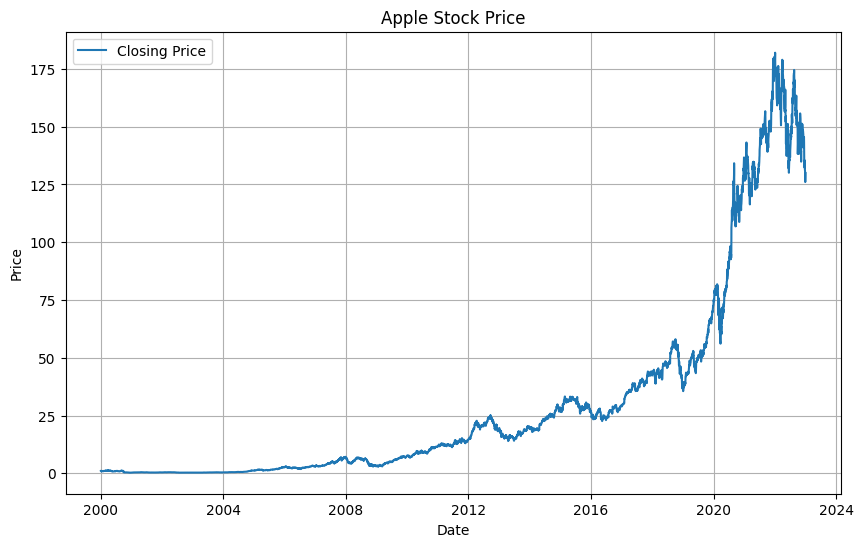

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to collect stock data using yfinance for U.S. stocks
def get_us_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Preprocessing function
def preprocess_stock_data(stock_data):
    # Addressing missing values
    stock_data.fillna(method='ffill', inplace=True)

    # Computing daily returns
    stock_data['Daily_Return'] = (stock_data['Close'] - stock_data['Close'].shift(1)) / stock_data['Close'].shift(1)

    return stock_data

# Function to plot stock data
def plot_stock_data(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Collecting U.S. stock data
us_stock_data = get_us_stock_data('AAPL', '2000-01-01', '2023-01-01')
#us_stock_data = get_us_stock_data('RIOT', '2007-11-01', '2012-08-01')3

# Preprocessing U.S. stock data
preprocessed_us_stock_data = preprocess_stock_data(us_stock_data)

# Plotting preprocessed U.S. stock data
plot_stock_data(preprocessed_us_stock_data, 'Apple Stock Price')


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

# Function to generate QGAF representation for a single segment of time series data
def generate_qgaf(segment):
    qc = QuantumCircuit(1, 1)  # Add a classical register for measurement
    a = segment[0]  # Angle 'a' derived from the time series segment
    b = segment[1]  # Angle 'b' derived from the time series segment
    qc.ry(2 * a, 0)  # Apply Ry rotation gate for angle 'a'
    qc.ry(2 * b, 0)  # Apply Ry rotation gate for angle 'b'
    qc.measure(0, 0)  # Measure the qubit and store the result in the classical register
    return qc

# Function to execute the quantum circuit on a simulator
def execute_circuit(circuit):
    # Use AerSimulator for simulation
    simulator = Aer.get_backend('aer_simulator')

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)

    # Run the transpiled circuit on the simulator
    result = simulator.run(transpiled_circuit).result()

    return result

# Assuming 'preprocessed_us_stock_data' is a DataFrame containing preprocessed stock data
# Convert DataFrame to a list of numerical sequences
stock_data_sequence = preprocessed_us_stock_data['Close'].tolist()

# Segment the stock data into sequences of length 2
segments = [stock_data_sequence[i:i+2] for i in range(len(stock_data_sequence) - 1)]

# Generate QGAF representations for each segment
qgaf_representations = [generate_qgaf(segment) for segment in segments]

# Execute each quantum circuit and collect the results
results = [execute_circuit(qc) for qc in qgaf_representations]

# Process the results as needed


Result:
Measurement Outcomes: {'0': 117, '1': 907}
Probabilities: {'0': 0.1142578125, '1': 0.8857421875}


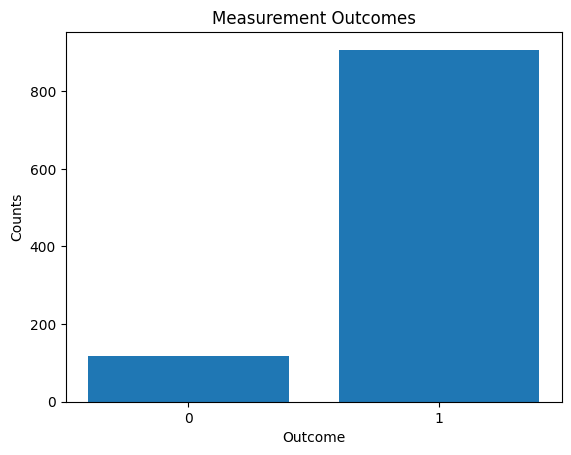

In [ ]:
# Example processing of results
result = results[-1]  # Get the last result in the list
print("Result:")
try:
    # Extract measurement outcomes
    counts = result.get_counts()
    print("Measurement Outcomes:", counts)
    # Calculate probabilities
    total_shots = sum(counts.values())
    probabilities = {outcome: count / total_shots for outcome, count in counts.items()}
    print("Probabilities:", probabilities)
    # Visualize measurement outcomes
    plt.figure()
    plt.bar(counts.keys(), counts.values())
    plt.title("Measurement Outcomes")
    plt.xlabel("Outcome")
    plt.ylabel("Counts")
    plt.show()
except Exception as e:
    print(f"Error processing result: {e}")
